ABSTRACT

Prior to crowd source reviews companies such as Amazon, Yelp, Trip Advisors, and etc., consumer purchases relies on word of mouth, advertising, and magazine reviews to make purchase decision. The information provided is very limited. To a buyer, it is a leap of faith to buy certain products which might be compatible to ones’ needs or to provide knowledge of the limitation of such products like its durability or ease of usage. The limitations are not solely felt by the consumers but also on the suppliers, manufacturers, and sellers.  To a company, knowing his consumers will enable the company to target sell to his consumers and open up his market to other consumers too.

Nowadays, crowd source review companies are influencing factors for consumers to make decisions on certain products. A positive review would mean a potential for more sale or assurance of the quality while a negative review would mean caution prior purchases or loss of sale potential. Aside from reviews, a company’s exposure in the social media meant volume of data could be harvested and vital unknown resources could be tapped for the betterment of the company or its industry. Crowd source reviews on places where people visit and the tourist patterns would be allow this study to expand markets or reduce resources


INTRODUCTION

World travel is a big industry. However, there are many attractions which tourist might meant to keep repetitive travel to the same locations to a minimal.  Therefore, the tourist would have few knowledge of the place. It is best the tourists have prior knowledge or expectations of the places. Consequently, they would research such locations through various resources one of such is crowd source reviews. Researching locations would enable the tourist to have a few undesirable experience during the world travel.

Using the same crowd source reviews, a  cruise or tour company would like to know what to expect from their customers and what their customers expect from the cruise and tour company. It is important for the cruise company if their customers, when they reached in certain port or tourist site, would return to the ship or to the tour group for their meals. This knowledge could help the cruise company or tour group plan for the meals which could reduce or increase their food inventory. 

RESEARCH QUESTIONS

Given a cruise or tour companies with average review ratings from different touring activities such as art galleries, danceclubs, juicebars, restaurants, museums, resorts, parks and picnic spots, beaches, theaters, and religious institutions. Can we predict whether activites could determine whether the tourist would join or wouldn't join there restaurant activity? 


GOALS

Train a classification model that performs better than 0.7663265306122449 accuracy.

In [1]:
#Import Libraries
import pandas as pd
import operator
import matplotlib
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

In [2]:
#The trip advisor cvs file was read. It is printed with the columns and rows of the data and the numbers of columns and rows. There are 11
#columns and 980 instances
asian_trip= pd.read_csv("tripadvisor_review.csv", encoding = "ISO-8859-1", engine='python')
asian_trip

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


DATA CLEANING

This part is the data cleaning where data types, non-null, and count are examined. There are 980 entries and all of them are counted. There is only one object data type which is represented by user ID. The remaining data type are float. These information is clean. No further cleaning of data is needed.

In [3]:
asian_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [4]:
#The columns for this data is unidentifiable. It is enumerated with category 1 to category 10. The 
#column names #were gathered from the UCI website, type in, and labeled in the columns for easy
#identification. 
print(asian_trip.columns.tolist(), end =" ")

['User ID', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10'] 

In [5]:
#column_names =['User', 'Category1', 'Category2', 'Category3', 'Category4', 'Category5', 'Category6',
#'Category7', 'Category8', 'Category9', 'Category10']
column_names =['Userid','artgalleries','danceclubs', 'juicebars','restaurants','museums','resorts',
               'parksPicnicspots','beaches', 'theaters','religiousinstitutions']
        

In [6]:
#Remove the space between the category and numbers asian_trip.columns
asian_trip.columns = column_names

In [7]:
#The column are labeled what the average rating for the activities. 
asian_trip

,Userid,artgalleries,danceclubs,juicebars,restaurants,museums,resorts,parksPicnicspots,beaches,theaters,religiousinstitutions
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


BRIEF EXPLORATORY DATA ANALYSIS

Histograms, describe (statistical measurements), and box plots will be provided below with results
and discussions.

Saving figure attribute_histogram_plots


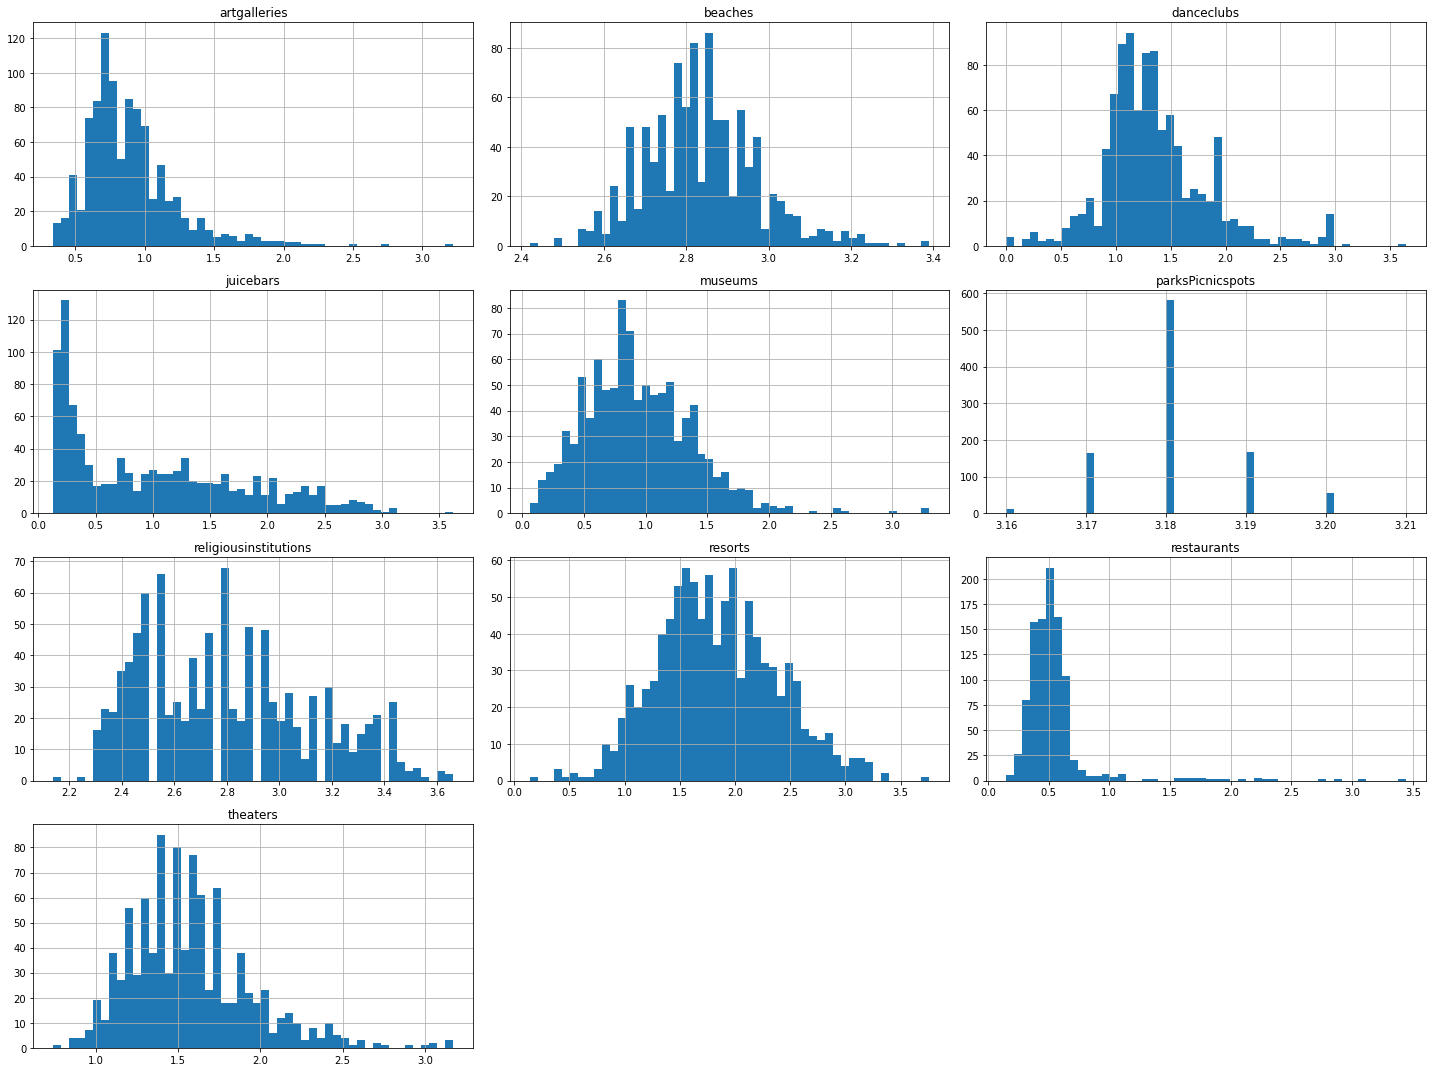

In [8]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

asian_trip.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

RESULTS AND DISCUSSION

The graphs for the dance clubs, beaches, parks and picnic spots, resorts are symetrical. The graphs for the religious institutions, restaurants and juice bars are left skewed. There are a couple of interesting graphs such as the parks and picnics spots, the variance is very small 0.01 from one point in the x-axis to other. There are activities that are slightly left skewed such as theater and museums.


In [9]:
#Using the describe feature, the counts, mean, standard deviation, minimum, maximum, 25%, 50% and 75% are shown
asian_trip.describe()

,artgalleries,danceclubs,juicebars,restaurants,museums,resorts,parksPicnicspots,beaches,theaters,religiousinstitutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


BRIEF EXPLORATORY DATA ANALYSIS

This dataset will use summary from the describe features in pandas to explore the data. 

The highest average review rating mean is for the parks, picnic, and spots which is 3.18. Most reviewers gave consistently
almost the same rating it is between 3.16 and 3.21. Therefore, the standard deviation is very low number of 0.007 meaning 
its disperson is almost none.

The next highest mean goes to beaches which is 2.835. The maximum and minimum rating of the beaches are 3.39 and 2.42. Its
STD is a low 0.137505 meaning there is not much disperson.

The third highest average review rating mean goes to the religious institution which is  2.799. Its maximum is the high
3.66 which is one of the highest maximum from the 10 attributes. Its minimum rating review is 2.14. Its STD is 0.32 which 
is means its has a low spread.

The lowest average review rating mean is for the restaurants which is only 0.532500. However, its maximum is 3.44 yet its
minimum 0.1500. Its STD is 0.279731 meaning its dispersion is also low. These information is confirmed by the 25%, 50%, and
75% which are .41, .50, and .58. There is a probability that the maximum is an outlier. 

The second to the lowest average review rating mean is for the art galleries which is 0.893194. The minimum is 0.344 while its
maximum is 3.22. The std is .326 which is also a low distribution. 

The third to the lowest average review rating mean is for museums which 0.939735. Its maximum is3.30 while its minimum is 0.060 . 
its STD is 0.437 which is a low dispersion. However, this dispersion in these data is on the low side.


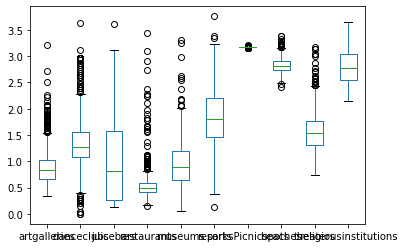

In [10]:
#Below is the creation of the box plot. There are many outliers which can affect the results of the properties of the
#dataset. After creating the box plot. The box plot will be cleaned of the outliers.

asian_trip.plot(kind = 'box')

In [11]:
#Created a function for remvoing the top outliers
x = asian_trip.artgalleries
y = 1.5
def removing_top_outliers(x):
    if x > y:
        return y
    else:
        return x

asian_trip.artgalleries = asian_trip.artgalleries.map(removing_top_outliers)

In [12]:
#Created another function for removing the lower outliers
x = asian_trip.danceclubs
y = 2.0
z = 0.5
    
def removing_bottom_outliers(x):
    if x < z:
        return z
    
    else:
        return x

asian_trip.danceclubs = asian_trip.danceclubs.map(removing_top_outliers)
asian_trip.danceclubs = asian_trip.danceclubs.map(removing_bottom_outliers)


In [13]:
x = asian_trip.juicebars
y = 3.5

asian_trip.juicebars = asian_trip.juicebars.map(removing_top_outliers)


In [14]:
x = asian_trip.restaurants
y = .80
z = 0.25

asian_trip.restaurants = asian_trip.restaurants.map(removing_top_outliers)
asian_trip.restaurants = asian_trip.restaurants.map(removing_bottom_outliers)


In [15]:
x = asian_trip.juicebars
y = 2

asian_trip.museums = asian_trip.museums.map(removing_top_outliers)

In [16]:
x = asian_trip.parksPicnicspots
y = 3.18
z = 3.18

asian_trip.parksPicnicspots = asian_trip.parksPicnicspots.map(removing_top_outliers)
asian_trip.parksPicnicspots = asian_trip.parksPicnicspots.map(removing_bottom_outliers)

In [17]:
x = asian_trip.resorts
y = 3.20
z = 0.40

asian_trip.resorts = asian_trip.resorts.map(removing_top_outliers)
asian_trip.resorts= asian_trip.resorts.map(removing_bottom_outliers)

In [18]:
x = asian_trip.beaches
y = 3.15
z = 2.5

asian_trip.beaches = asian_trip.beaches.map(removing_top_outliers)
asian_trip.beaches = asian_trip.beaches.map(removing_bottom_outliers)

In [19]:
x = asian_trip.theaters
y = 2.25

asian_trip.theaters = asian_trip.theaters.map(removing_top_outliers)

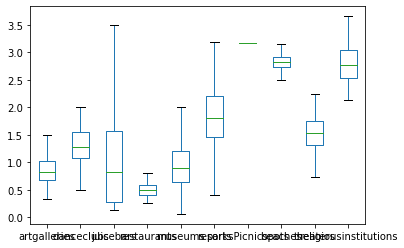

In [20]:
asian_trip.plot(kind = 'box')

BRIEF EXPLORATORY DATA ANALYSIS

This dataset will use the also boxplot to explore the data. 

There is no outlier for the religious institutions (skewed left) meaning reviews are fairly consistent and its median is third to the highest which is behind beaches (symmetrical) the second to the highest median. The highest median is parks and picnic spots.  There is no interquartile range nor lower and higher fence which means there is little or hardy any spread on the boxplot for the parks & picnic spots.

The fourth highest median is the resorts whose box plot is symmetrical with long lines for the upper and lower fences.

The fifth highest median is the theater, followed by dance club. The box plot for the theater and dance club are symmetrical.

The second to the lowest median are for art galleries, juice bars and museums. Art galleries’ and museum’s box plots are symmetrical while juice bars’ box plot has a big range with skewed to the right.

The lowest median is the restaurants with small range and spread. The boxplot is symmetrical.


Logistic Regression

This logistic regressions is binary. A average review for restaurants lower than .58 is 0 while equal or higher than 0.58 is 1. The 0.58 is the 75%  quantile.

In [21]:
asian_trip.restaurants.quantile(q=.75)

0.58

In [22]:
#X variables are all 9 different attributes except the restaurant. These 9 attributes are indepedent variable
#y variable is the restaurant which is the dependent variable

X = asian_trip.loc[ : , ['artgalleries','danceclubs', 'juicebars','museums','resorts','parksPicnicspots','beaches', 'theaters','religiousinstitutions']]
y = asian_trip.restaurants
print('Class Labels: ', np.unique(y, return_counts=True))

Class Labels:  (array([0.25, 0.26, 0.27, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.45, 0.46, 0.47, 0.48, 0.49,
       0.5 , 0.51, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.69, 0.71, 0.72, 0.73, 0.74, 0.75,
       0.77, 0.78, 0.79, 0.8 ]), array([20,  4,  7, 13,  8,  9, 12, 21, 17, 22, 20, 21, 37, 20, 37, 33, 33,
       29, 29, 36, 28, 31, 43, 38, 42, 29, 32, 32, 26, 22, 20, 30, 25, 14,
       23, 17, 16,  9,  7,  5,  4,  3,  1,  4,  1,  2,  2, 46],
      dtype=int64))


In [23]:
asian_trip['gety']=pd.cut(asian_trip['restaurants'],[0,0.58, asian_trip['restaurants'].max()],labels=[0,1])
asian_trip['gety_i']= asian_trip['gety'].astype(int)
print(asian_trip['gety_i'].value_counts())

0    751
1    229
Name: gety_i, dtype: int64


In [24]:
## Dummy Model Accuracy Rate (Baseline)- anything higher has a possibility of eating in the restaurant
print("The ratio of those who will eat at the restaurant: ", 751/(751+229))

The ratio of those who will not eat at the restaurant:  0.7663265306122449


In [25]:
# There were two more categories added to get the y. Since y is float, it was converted to an integer, so it can used for 
#logistic regression

asian_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Userid                 980 non-null    object  
 1   artgalleries           980 non-null    float64 
 2   danceclubs             980 non-null    float64 
 3   juicebars              980 non-null    float64 
 4   restaurants            980 non-null    float64 
 5   museums                980 non-null    float64 
 6   resorts                980 non-null    float64 
 7   parksPicnicspots       980 non-null    float64 
 8   beaches                980 non-null    float64 
 9   theaters               980 non-null    float64 
 10  religiousinstitutions  980 non-null    float64 
 11  gety                   980 non-null    category
 12  gety_i                 980 non-null    int32   
dtypes: category(1), float64(10), int32(1), object(1)
memory usage: 89.2+ KB


In [26]:
model = smf.logit('gety_i ~ artgalleries + danceclubs + juicebars + museums + resorts + parksPicnicspots + beaches + theaters + religiousinstitutions', data = asian_trip)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.449334
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                 gety_i   No. Observations:                  980
Model:                          Logit   Df Residuals:                      971
Method:                           MLE   Df Model:                            8
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.1735
Time:                        10:04:39   Log-Likelihood:                -440.35
converged:                       True   LL-Null:                       -532.80
Covariance Type:            nonrobust   LLR p-value:                 9.563e-36
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6143        nan        nan        nan         nan        

C:\Users\Marissa\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Marissa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


RESULTS AND DISCUSSION

Above is the Logistic Regression Results. 

The p-value for art galleries, juice bars, resorts, and religious institutions are statistically significant because the p-value should be lesser than .05. It is interpreted that the intercept is 1.5320. For one unit increase in art galleries, the odds increases by a multiplicative factor of 0.6346. For one unit increase in juice bars, the odds decreases by a multiplicative factor of 0.3620. For one unit increase in religious institutions, the odds decreases by a multiplicative
factor of 3.7158. For one unit increase in resorts, the odds increase by a multiplicative facor of 0.8338.

The p-value for theaters, beaches, museums, and dance clubs are statistically insignificant because the p-value is bigger than 0.5 which makes it statistically insignificant or not sure. Its effect
is not by random chance.


In [27]:
odds_ratios = np.exp(results.params)
print(odds_ratios)

Intercept                1.848453
artgalleries             1.886237
danceclubs               1.081310
juicebars                0.696281
museums                  0.681050
resorts                  2.302092
parksPicnicspots         7.053574
beaches                  1.293827
theaters                 0.876090
religiousinstitutions    0.024337
dtype: float64


RESULTS AND DISCUSSION

For every one unit increase in art galleries, the odds of the good review increases by 1.848453 times. For every one unit
increase in parks and picnic spots, the odds of the good review increases by 7.053574 times. 

MODELING


In [28]:
# Randomly split X and y arrays to 30% test data, 70% training data. 
X_train, X_test, y_train, y_test = train_test_split(X, asian_trip['gety_i'], test_size = .3, random_state =25)

lr = LogisticRegression().fit(X_train, y_train)
print("This is the accuracy of the training scores: ", lr.score(X_train, y_train))

This is the accuracy of the training scores:  0.7653061224489796


In [29]:
print("The data is being split to training data: ", X_train.shape, y_train.shape)

The data is being split to training data:  (686, 9) (686,)


In [30]:
print("The data is split to testing data: ", X_test.shape, y_test.shape)

The data is split to testing data:  (294, 9) (294,)


In [31]:
print("This is the co-efficient: ", lr.coef_)

This is the co-efficient:  [[ 3.16690021e-01  7.84512223e-03 -2.77530972e-01 -2.30840425e-01
   9.38582891e-01  6.74049818e-04 -9.71471583e-02 -8.01653649e-02
  -2.81985079e+00]]


In [32]:
print("This is the intercepts: ", lr.intercept_)

This is the intercepts:  [5.28959296]


In [33]:
#the array is 0 which represents average review rating less than 0.58 which the assumption is the tourist will not
#eat at the restaurant. while 1 represents those average review ratings equal or higher than 0.58, its assumption is
#the tourist will eat at the restaurant.
np.unique(y_train,return_counts=True)


(array([0, 1]), array([526, 160], dtype=int64))

In [34]:
print("The ratio of those who will eat at the restaurant: ", 526/(526+160))

The ratio of those who will eat at the restaurant:  0.7667638483965015


RESULTS AND DISCUSSION

The ratio of those who will eat at the restaurant:  0.7663265306122449. This ratio is the baseline and uses a dummy model. Using the y-train model, the ratio of those who will eat at the restaurant:  0.7667638483965015. These ratio have very little variance.

In [35]:
## scaling data
sc = StandardScaler()

#training mean and std calculated
sc.fit(X_train)
X_train_std = sc.transform(X_train)

#Never fit onto Test data!! Only Tansform
X_test_std = sc.transform(X_test)


In [36]:
## only use training mean and std
X_train_std

array([[-0.37557553,  1.19932128, -0.52644001, ...,  2.48801434,
         0.06268955,  0.56127032],
       [ 0.10655813,  1.72066619,  0.31009326, ..., -0.07308372,
         0.33564108, -0.93266785],
       [-0.37557553,  0.67797638,  1.85446238, ...,  0.15974337,
         2.00367824, -0.93266785],
       ...,
       [ 0.32908136, -0.67752039,  1.08227782, ..., -1.54765534,
        -0.99878864,  0.99700228],
       [-0.48683714, -0.88605835,  2.25342441, ..., -0.22830179,
        -0.63485326, -1.0571627 ],
       [ 0.21781975,  0.78224536,  0.91497117, ..., -0.69395598,
         1.0331839 ,  0.43677547]])

CROSS VALIDATION


In [37]:
#call cross-validate with return_train_score, return estimator, cv =5
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_std,
                             y = y_train,
                             cv = 5,
                             n_jobs= -1, 
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


In [38]:
#Investigate the cv results
cv_fivefold['test_score']


array([0.80434783, 0.77372263, 0.72262774, 0.75182482, 0.72262774])

In [39]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

In [40]:
print('Vanilla Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Vanilla Regression 5-fold cv results (Accuracy) 0.755 =/- 0.031


In [41]:
#Initializing Classifications
logreg = LogisticRegression(penalty = 'none', random_state=1)
logreg.fit(X_train_std, y_train)

LogisticRegression(penalty='none', random_state=1)

In [42]:
clf1 = LogisticRegression(random_state=1, solver='lbfgs')
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))

X_train = np.array(X_train_std, dtype=np.int64)
y_train = np.array(y_train, dtype=np.int64)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)

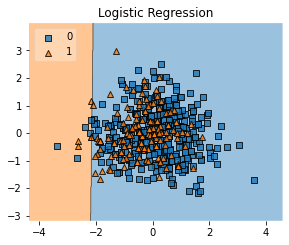

In [43]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression']
for clf, lab, grd in zip([clf1],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train2, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X= X_train2, y= y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [44]:
X = np.array([[1,1]])
clf.predict_proba(X)

array([[0.86437017, 0.13562983]])

Results and Discussion

Making Probability Predictions for the first array, P(y=0|X=[1,1]) is 0.86437017 while for the second array, P(y=1|X=[1,1]) is 0.13562983.

In [45]:
#Import Libraries
from IPython.display import display, HTML
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

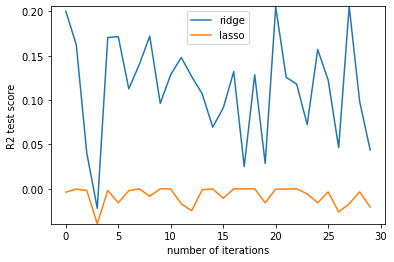

In [46]:
X = asian_trip.loc[ : , ['artgalleries','danceclubs', 'juicebars','museums','resorts','parksPicnicspots','beaches', 'theaters','religiousinstitutions']]

def model_experiment(num_iter = 5, 
                     models = ['logreg', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    
    x_axis = np.arange(num_iter)
    y_logreg_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, asian_trip['gety_i'], test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, asian_trip['gety_i'], test_size = 0.2)
            ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()

        sd.fit(X_train)

        X_train = sd.transform(X_train)

        X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'logreg' in models:
            lr = LogisticRegression()

            lr.fit(X_train, y_train)
            
            sample_models['logreg'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_logreg_test.append(test_score)

    #       print('test score OLS is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #       print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #       print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'logreg' in models:
        plt.plot(y_logreg_test, label = 'logReg')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    all_results = y_logreg_test + y_lasso_test + y_ridge_test
    plt.ylim((np.min(all_results), np.max(all_results)))
    
    plt.legend()
    return sample_models

trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 2)


C:\Users\Marissa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marissa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Marissa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marissa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

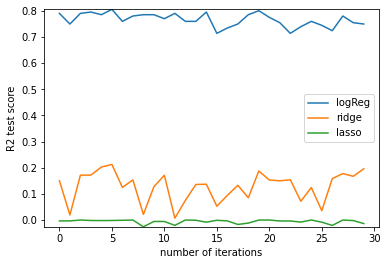

In [47]:
trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['logreg','ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 2)


In [48]:
# After run model_experiment with complexity == 'polynomial'

lr_logreg = trained_models['logreg']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']


In [49]:
lr_lasso.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0., -0.,
        0., -0., -0.])

In [50]:
lr_ridge.coef_

array([ 0.        , -0.0008624 ,  0.03609553, -0.03423048,  0.03327774,
        0.02213759,  0.        , -0.00710337, -0.0214294 , -0.04878662,
        0.10106949, -0.05885477, -0.07168595,  0.00420625,  0.02991027,
       -0.0008624 ,  0.00348285,  0.07767764, -0.08883546, -0.08059222,
        0.00979593,  0.01427633, -0.03685467,  0.03609553,  0.04560074,
        0.02524202,  0.01253919,  0.00514111, -0.02110155,  0.05478497,
       -0.03423048, -0.03047456, -0.04171297,  0.11209605,  0.02123266,
       -0.09007953,  0.03327774,  0.02188859, -0.05418189, -0.0098852 ,
       -0.00030822,  0.02213759,  0.06623461,  0.0566018 , -0.06924633,
        0.        , -0.00710337, -0.0214294 , -0.04878662,  0.01555969,
       -0.00898793, -0.02569326,  0.00307043, -0.03084155,  0.02993722])

In [51]:
lr_logreg.coef_

array([[ 0.00000000e+00,  1.78838121e-02,  2.86802396e-01,
        -6.10982424e-01,  2.46429453e-01, -6.54959823e-02,
         7.93511471e-04, -1.49777653e-01, -2.44768309e-01,
        -3.32212060e-01,  8.96228866e-01, -4.37000190e-01,
        -5.03332595e-01,  1.17029396e-01,  1.07087543e-01,
         1.78838121e-02,  1.75783481e-02,  5.85115461e-01,
        -9.70289358e-01, -8.33269577e-01,  9.57763384e-02,
         3.49514387e-02, -3.43596538e-01,  2.86802396e-01,
         3.82211170e-01,  3.89498121e-01,  1.91639220e-01,
         4.71749820e-02, -1.02632119e-01,  6.75708732e-01,
        -6.10982424e-01, -5.26966753e-01, -3.00616268e-01,
         1.53701363e+00,  1.41324315e-01, -8.75065902e-01,
         2.46429453e-01,  6.54770014e-02, -3.96001433e-01,
         1.68843204e-01, -4.79298075e-01, -6.54959823e-02,
         5.71048699e-01,  4.68412948e-01,  3.64982682e-01,
         7.93511471e-04, -1.49777653e-01, -2.44768309e-01,
        -3.32212060e-01,  2.48876792e-01,  3.55958967e-0

RESULTS AND DISCUSSION

The variance with logistic regresion, lasso and ridge is between below 0 to 1. There is a huge variance. However, when the graph is without logistic regression, only lasso and ridge the 
variance is small which is only -0.15 to 0.15. The lasso and ridge are almost identical. The difference lies in the equation which becomes evident in the outcome. The ridge equation shrinks the slope asymphotically close to 0 while the lasso can shrink all the way to 0. Lasso can exclude useless variables from the equations while ridge performs better when most variables are useful. As we see from above, lasso uses 0 coefficient which allows more predictability, and there are many useless variables in the data which is why it shrinks to 0.

CONCLUSION AND SUMMARY

Upon careful exploration of the data, the reviewer's average rating is low because for a scale of 0 to 4. The reviewer's rating for mean for restaurant is .53 which means the reviewer gave a rating between terrible to poor. Nevertheless, we try to predict the outcome using 75% of the results which is .58.

There are a few statiscally significant co-efficient in relation to p-value such as art galleries, juice bars, resorts, and religious institutions. The ratio of those who will eat at the restaurant:  0.7663265306122449. Using the Vanilla Regression 5-fold cv results (Accuracy) 0.755 =/- 0.031. 

Further exploring the data, the usability of harvesting the data becomes questionable. Questions such as userid, are the userid the identification of one person or a group of people because the results were called average user feedback? Another question is did all traveller participate in the 10 different activities to give reliable feedbacks. And another question is why are the average user feedback terribly low especially for the restaurants. 

My conclusion is initial exploration of data should be given careful thoughts. Otherwise, GIGO, Garbage In and Garbage Out, seems inevitable and waste of time and money becomes unavoidable. In this study, the threshold for the dependent variable were significantly reduce to allow the data to be usable.



LIMITATIONS AND LATER WORK

Crowd source reviews were gathered from trip advisors. The review ratings were from 1 to 4 with 1 being the lowest while 4 the highest. These average ratings of the reviews were very low.  The mean for restaurants was only 0.53. While other activities were not as low, but still their mean were not any higher. Most of them were hovering around 1. Religious institutions, beaches, and parks and picnic spots have higher mean which is around 3. These places doesn't much services offered and people's expectation were not as high was service oriented location. 

Also, it seems more people make more complains than compliments to companies. This lead to the assumption that there might be more people who didn't make reviews. Since most reviewers need to complain or to make reviews when services or products were not up to parr.


REFERENCES AND CONTRIBUTIONS

Renjith, Shini, A. Sreekumar, and M. Jathavedan. “Evaluation of Partitioning Clustering Algorithms for Processing Social Media Data in Tourism Domain.” Recent Advances in Intelligent Computational Systems. 6 Dec. 2018: 21 Oct. 2020. < https://ieeexplore.ieee.org/document/8635080>.

Renjith, Shini. “UCI Machine Learning Repository: Travel Reviews Data Set.” Archive.Ics.Uci.Edu, 19 Dec. 2019, archive.ics.uci.edu/ml/datasets/Travel + Reviews. Accessed 26 Oct. 2020